In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")


In [40]:
"""
Function for k-fold cross validation for a random forest
classifier to determine accuracy. Runs PCA on the input.
The number of principal components is hard coded.

Parameters:
X(nd.array): Two dimensional numpy array containing X feature data
Y(nd.array): Two dimensional numpy array containing dummified classes
tree_depth(int): Maximum depth of the random forest
splits(int): Number of splits for kfold cross validation
class_labels(list): List of strings containing the class labels for
    the classifier
cw(dict/None): Dictionary containing class weights for each class label,
    an be passed none for equal weighting

Returns:
tuple(float, list) --> (accuracy, cnf_tables)

"""
def run_kfold_pca(X, Y, splits, tree_depth, class_labels, cw):
    kf = KFold(n_splits=splits)
    cnf_tables = []
    num_correct = 0
    num_total = 0
    
    for train_index, test_index, in kf.split(X):
        # Split data into train and test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        pca = PCA(n_components = 11)  
        X_train = pca.fit_transform(X_train)  
        X_test = pca.transform(X_test)
        
        clf = RandomForestClassifier(max_depth = tree_depth, class_weight = cw) 
        clf.fit(X_train, y_train)
        
        # Predicting the Test set results
        y_pred = clf.predict(X_test)
      
        num_correct += np.sum(y_pred == y_test)
        num_total += len(y_pred)
        
        cnf_tables.append(confusion_matrix(y_test, y_pred, labels = class_labels))
    return ((num_correct/num_total), cnf_tables)


"""
Function for k-fold cross validation for an ensemble of Ada-Bosoted random forest
classifiers to determine accuracy.

Parameters:
X(nd.array): Two dimensional numpy array containing X feature data
Y(nd.array): Two dimensional numpy array containing dummified classes
tree_depth(int): Maximum depth of the random forest
splits(int): Number of splits for kfold cross validation
num_est(int): Number of models in the ensemble
class_labels(list): List of strings containing the class labels for
    the classifier

Returns:
tuple(float, list) --> (accuracy, cnf_tables)

"""

def run_kfold_rf_adaboost(X, Y, splits, tree_depth, num_est, class_labels):
    kf = KFold(n_splits=splits)
    cnf_tables = []
    num_correct = 0
    num_total = 0
    
    for train_index, test_index, in kf.split(X):
        # Split data into train and test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        
        rf = RandomForestClassifier(max_depth = tree_depth)    
        clf = AdaBoostClassifier(n_estimators = num_est, base_estimator=rf,
            learning_rate = 1)
        
        clf.fit(X_train, y_train)
        
        # Predicting the Test set results
        y_pred = clf.predict(X_test)
      
        num_correct += np.sum(y_pred == y_test)
        num_total += len(y_pred)
        
        cnf_tables.append(confusion_matrix(y_test, y_pred, labels = class_labels))
    return ((num_correct/num_total), cnf_tables)


"""
Function for k-fold cross validation for a random forest
classifier to determine accuracy.

Parameters:
X(nd.array): Two dimensional numpy array containing X feature data
Y(nd.array): Two dimensional numpy array containing dummified classes
tree_depth(int): Maximum depth of the random forest
splits(int): Number of splits for kfold cross validation
class_labels(list): List of strings containing the class labels for
    the classifier
cw(dict/None): Dictionary containing class weights for each class label,
    an be passed none for equal weighting

Returns:
tuple(float, list) --> (accuracy, cnf_tables)

"""
def run_kfold(X, Y, splits, tree_depth, class_labels, cw):
    kf = KFold(n_splits=splits)
    cnf_tables = []
    num_correct = 0
    num_total = 0
    
    for train_index, test_index, in kf.split(X):
        # Split data into train and test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        clf = RandomForestClassifier(max_depth = tree_depth, class_weight = cw) 
        clf.fit(X_train, y_train)

        # Predicting the Test set results
        y_pred = clf.predict(X_test) 
        num_correct += np.sum(y_pred == y_test)
        num_total += len(y_pred)
        cnf_tables.append(confusion_matrix(y_test, y_pred, labels = class_labels))

    return ((num_correct/num_total), cnf_tables)

"""
Function for k-fold cross validation of an ensemble of ada boosted
random forests. PCA is applied to the input. The number of principal 
components is hard coded.

Parameters:
X(nd.array): Two dimensional numpy array containing X feature data
Y(nd.array): Two dimensional numpy array containing dummified classes
splits(int): Number of splits for kfold cross validation
tree_depth(int): Maximum depth of the random forest
num_est(int): Number of models in the ensemble
class_labels(list): List of strings containing the class labels for
    the classifier


Returns:
tuple(float, list) --> (accuracy, cnf_tables)

"""
def run_kfold_pca_adaboost(X, Y, splits, tree_depth, num_est, class_labels):

    kf = KFold(n_splits=splits)
    cnf_tables = []
    num_correct = 0
    num_total = 0
    
    for train_index, test_index, in kf.split(X):
        # Split data into train and test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        pca = PCA(n_components = 11)  
        X_train = pca.fit_transform(X_train)  
        X_test = pca.transform(X_test)
        
        rf = RandomForestClassifier(max_depth = tree_depth) 
        clf = AdaBoostClassifier(n_estimators = num_est, base_estimator=rf,
            learning_rate = 1)
        clf.fit(X_train, y_train)
                
        # Predicting the Test set results
        y_pred = clf.predict(X_test) 
        
        num_correct += np.sum(y_pred == y_test)
        num_total += len(y_pred)
        
        cnf_tables.append(confusion_matrix(y_test, y_pred, labels = class_labels))
    return ((num_correct/num_total), cnf_tables)


"""
Function for k-fold cross validation for a decision tree
classifier to determine accuracy.

Parameters:
X(nd.array): Two dimensional numpy array containing X feature data
Y(nd.array): Two dimensional numpy array containing dummified classes
splits(int): Number of splits for kfold cross validation
class_labels(list): List of strings containing the class labels for
    the classifier
pca_flag(boolean): Flag to decide whether PCA of the input is applied.
    The number of principal components is hard coded
opt(string): criterion for splitting decision tree "entropy" or "gini"

Returns:
tuple(float, list) --> (accuracy, cnf_tables)

"""


def run_kfold_dtree(X, Y, splits, class_labels, pca_flag, opt):
    kf = KFold(n_splits=splits)
    cnf_tables = []
    num_correct = 0
    num_total = 0
    
    for train_index, test_index, in kf.split(X):
        # Split data into train and test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        if(pca_flag):
            pca = PCA(n_components = 11)  
            X_train = pca.fit_transform(X_train)  
            X_test = pca.transform(X_test)
            
        clf = DecisionTreeClassifier(criterion = opt)
        clf.fit(X_train, y_train)
        # Predicting the Test set results
        y_pred = clf.predict(X_test) 
        
        num_correct += np.sum(y_pred == y_test)
        num_total += len(y_pred)
        
        cnf_tables.append(confusion_matrix(y_test, y_pred, labels = class_labels))
    return ((num_correct / num_total), cnf_tables)

"""
Function for k-fold cross validation for an ensemble of ada-boosted decision tree
classifiers to determine accuracy.

Parameters:
X(nd.array): Two dimensional numpy array containing X feature data
Y(nd.array): Two dimensional numpy array containing dummified classes
splits(int): Number of splits for kfold cross validation
class_labels(list): List of strings containing the class labels for
    the classifier
pca_flag(boolean): Flag to decide whether PCA of the input is applied.
    The number of principal components is hard coded
opt(string): criterion for splitting decision tree "entropy" or "gini"
num_est: the number of models in the ensemble

Returns:
tuple(float, list) --> (accuracy, cnf_tables)

"""

def run_kfold_dtree_adaboost(X, Y, splits, class_labels, pca_flag, opt, num_est):
    kf = KFold(n_splits=splits)
    cnf_tables = []
    num_correct = 0
    num_total = 0
    
    for train_index, test_index, in kf.split(X):
        # Split data into train and test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        if(pca_flag):
            pca = PCA(n_components = 11)  
            X_train = pca.fit_transform(X_train)  
            X_test = pca.transform(X_test)
            
        d_tree = DecisionTreeClassifier(criterion = opt)
        clf = AdaBoostClassifier(n_estimators = num_est, base_estimator=d_tree,
            learning_rate = 1)
        clf.fit(X_train, y_train)
        # Predicting the Test set results
        y_pred = clf.predict(X_test) 
        
        num_correct += np.sum(y_pred == y_test)
        num_total += len(y_pred)
        
        cnf_tables.append(confusion_matrix(y_test, y_pred, labels = class_labels))
    return ((num_correct / num_total), cnf_tables)

"""
Function for initial data cleaning.

Parameters:

sensor(string): sensor name 
activity(string): activity type

Returns:

pandas Dataframe

"""
def clean_data(sensor, activity):
    data = pd.read_csv(sensor + ".csv", low_memory = False)
    # Take out unnamed columns
    data.drop([col for col in data.columns if "Unnamed" in col], axis=1, inplace = True)
    # Drop not encoded data
    data = data[data[activity] != 'private/not coded']
    return data


# Data Import

In [16]:
data = clean_data("thigh", "updated_final_activity")
used_cols = data.columns[18:(82 + 19)].tolist() + ['updated_final_activity']
used_data = data[used_cols]


X = used_data.drop("updated_final_activity", axis = 1).apply(lambda x: (x - np.mean(x)) / np.std(x))
y = used_data['updated_final_activity']

## Optimize Random Forest Original Input

In [32]:
# Optimize random forest with original input
tree_depths = []
accs = []
dummy_labels = ['sit/lie', 'stand and move', 'walking', 'running',
               'bicycling']
for depth in range(1,18,2):  
    res = run_kfold(X.values, y.values, 10, depth, dummy_labels, None)
    tree_depths.append(depth)
    accs.append(res[0])
    #print('Depth: ' + str(depth) + " Acc: " + str(acc))

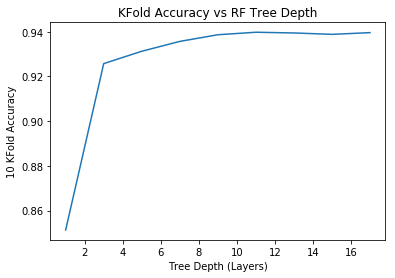

In [33]:
plt.plot(tree_depths,accs)
plt.title("KFold Accuracy vs RF Tree Depth")
plt.ylabel('10 KFold Accuracy')
plt.xlabel("Tree Depth (Layers)")
plt.show()

## Optimize Random Forest PCA Input

In [34]:
# Optimize random forest with PCA 
tree_depths = []
accs = []
dummy_labels = ['sit/lie', 'stand and move', 'walking', 'running',
               'bicycling']
for depth in range(1,18,2):  
    res = run_kfold_pca(X.values, y.values, 10, depth, dummy_labels,
                       None)
    tree_depths.append(depth)
    accs.append(res[0])
    # print('Depth: ' + str(depth) + " Acc: " + str(acc))

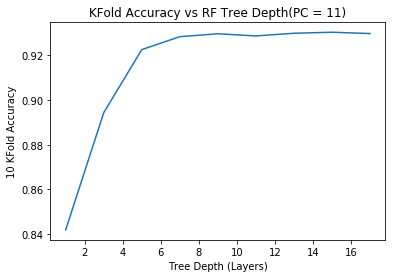

In [35]:
plt.plot(tree_depths,accs)
plt.title("KFold Accuracy vs RF Tree Depth(PC = 11)")
plt.ylabel('10 KFold Accuracy')
plt.xlabel("Tree Depth (Layers)")
plt.show()

## Best RF for PCA Input

In [36]:
dummy_labels = ['sit/lie', 'stand and move', 'walking', 'running',
               'bicycling']
res = run_kfold_pca(X.values, y.values, 10, 7, dummy_labels, None)
sum_cnf_matrix = np.sum(res[1], axis = 0)
np.savetxt("thigh_upfinal_pcarf_cnf_mat.txt", sum_cnf_matrix,
                   fmt = '%1.2f')
res[0]

0.9272823207335029

## Best RF for Orignal Input

In [37]:
dummy_labels = ['sit/lie', 'stand and move', 'walking', 'running',
               'bicycling']
res = run_kfold(X.values, y.values, 10, 9, dummy_labels, None)
sum_cnf_matrix = np.sum(res[1], axis = 0)
np.savetxt("thigh_upfinal_rf_cnf_mat.txt", sum_cnf_matrix,
                   fmt = '%1.2f')
res[0]

0.9358847920793173

## Best RF for PCA Input W/ Balanced Class Weights

In [98]:
dummy_labels = ['sit/lie', 'stand and move', 'walking', 'running',
               'bicycling']
res = run_kfold_pca(X.values, y.values, 10, 7, dummy_labels, "balanced")
sum_cnf_matrix = np.sum(res[1], axis = 0)
res[0]

0.9186908994472208

## Best RF for PCA Input W/ Balanced Subsample Class Weights

In [99]:
dummy_labels = ['sit/lie', 'stand and move', 'walking', 'running',
               'bicycling']
res = run_kfold_pca(X.values, y.values, 10, 7, dummy_labels,
                    "balanced_subsample")
sum_cnf_matrix = np.sum(res[1], axis = 0)
res[0]

0.9209451115917887

## Principal Component Analysis

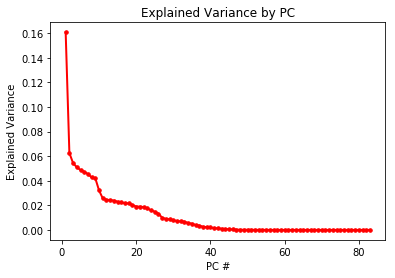

In [19]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

explained_variance = pca.explained_variance_ratio_  

plt.title("Explained Variance by PC")
plt.xlabel("PC #")
plt.ylabel("Explained Variance")
plt.plot([x for x in range(1,84)], explained_variance,'ro-', linewidth=2, markersize=3.5)

In [28]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

pca = PCA(n_components = 11)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

explained_variance = pca.explained_variance_ratio_  
labels = ["PC-" + str(x) for x in range(1,12)]
pc_df = pd.DataFrame(pca.components_,columns=used_cols[:-1],index = labels)
pc_df

,mean.x,std.x,min.x,max.x,mean.y,std.y,min.y,max.y,mean.z,std.z,...,mfft6,mfft7,mfft8,mfft9,mfft10,mfft11,mfft12,mfft13,mfft14,mfft15
PC-1,-0.136359,0.263766,-0.246682,0.156493,0.001959,0.263380,-0.229240,0.228747,-0.107844,0.264141,...,0.003153,-0.007974,0.002378,0.002378,-0.007974,0.003153,-0.003178,-0.005670,-0.010181,0.000304
PC-2,0.363491,0.030243,0.110489,0.318694,-0.170037,0.020858,-0.076121,-0.032331,0.345393,0.028334,...,0.004062,-0.011712,0.007340,0.007340,-0.011712,0.004062,-0.006412,-0.005937,-0.005946,-0.006917
PC-3,-0.002180,0.004193,-0.003781,0.003182,-0.010951,-0.000157,-0.004243,-0.007078,-0.003398,0.001163,...,-0.100362,-0.045594,-0.147632,-0.147632,-0.045594,-0.100362,-0.252625,0.159895,0.123708,-0.025976
PC-4,0.005684,0.004976,-0.003388,0.008882,-0.009411,0.002696,-0.007721,-0.000960,0.002030,0.002685,...,0.177625,0.112214,-0.360929,-0.360929,0.112214,0.177625,0.019899,-0.070611,-0.044244,-0.020250
PC-5,-0.001646,-0.002037,0.000822,-0.002107,0.011650,0.000629,0.007857,0.011643,0.008990,0.007896,...,0.260141,0.072821,0.118207,0.118207,0.072821,0.260141,0.021352,0.069149,0.303302,-0.111891
PC-6,0.000952,-0.002741,0.000139,-0.002572,-0.005068,-0.002382,-0.002403,-0.008114,-0.002548,-0.005943,...,0.100350,0.243904,0.111247,0.111247,0.243904,0.100350,-0.248929,-0.058381,-0.122253,0.164250
PC-7,-0.010999,-0.007903,0.000336,-0.020021,0.012176,-0.008367,0.008716,-0.002402,-0.011336,-0.009842,...,0.197358,-0.268391,0.048900,0.048900,-0.268391,0.197358,-0.178092,-0.058497,-0.140213,-0.131251
PC-8,0.008131,-0.001980,0.004514,0.002482,0.016569,-0.000055,0.009048,0.010277,0.012415,0.000731,...,0.137383,-0.040600,0.000414,0.000414,-0.040600,0.137383,0.129065,0.279494,-0.090444,0.173687
PC-9,-0.000975,0.001793,-0.001006,-0.002288,-0.001057,0.002085,-0.000863,-0.000258,-0.001474,0.003954,...,-0.033992,0.175896,0.033621,0.033621,0.175896,-0.033992,0.020826,0.154881,-0.056175,-0.359433
PC-10,-0.047992,-0.007485,-0.008867,-0.043074,-0.450084,-0.010783,-0.185681,-0.226276,-0.177178,-0.036340,...,0.014567,-0.003956,0.002212,0.002212,-0.003956,0.014567,0.029327,0.009898,0.004561,0.002486


## Best RF, ADA Boost(Optimize # Estimators)

In [7]:
# Optimize number of estimators
# Set max tree depth to 9, found by optimization
num_estimators = []
accs = []
dummy_labels = ['sit/lie', 'stand and move', 'walking', 'running',
               'bicycling']
for n in range(2,10):
    res = run_kfold_rf_adaboost(X.values, y.values, 10, 9, n, dummy_labels)
    num_estimators.append(n)
    accs.append(res[0])
    #print('# Estimators: ' + str(n) + " Acc: " + str(res[0]))

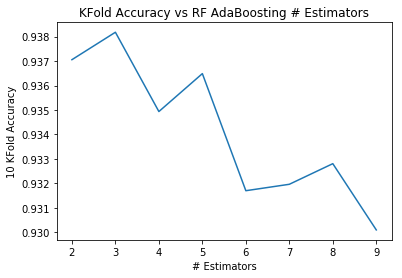

In [8]:
plt.plot(num_estimators,accs)
plt.title("KFold Accuracy vs RF AdaBoosting # Estimators")
plt.ylabel('10 KFold Accuracy')
plt.xlabel("# Estimators")
plt.show()

## Best RF for PCA, ADA Boost ( Optimize # Estimators)

In [94]:
# Optimize number of estimators
# Set max tree depth to 7, found by optimization
num_estimators = []
accs = []
dummy_labels = ['sit/lie', 'stand and move', 'walking', 'running',
               'bicycling']
for n in range(5,50,5):
    res = run_kfold_pca_adaboost(X.values, y.values, 10, 7, n, dummy_labels)
    num_estimators.append(n)
    accs.append(res[0])
    #print('# Estimators: ' + str(n) + " Acc: " + str(res[0]))

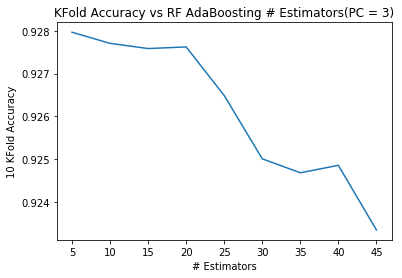

In [95]:
plt.plot(num_estimators,accs)
plt.title("KFold Accuracy vs RF AdaBoosting # Estimators(PC = 3)")
plt.ylabel('10 KFold Accuracy')
plt.xlabel("# Estimators")
plt.show()

## Decision Tree PCA Input

In [43]:
from sklearn.tree import DecisionTreeClassifier

res = run_kfold_dtree(X.values, y.values, 10, dummy_labels, True, 'gini')

sum_cnf_matrix = np.sum(res[1], axis = 0)
np.savetxt("thigh_upfinal_pcadtree_cnf_mat.txt", sum_cnf_matrix,
                   fmt = '%1.2f')
res[0]

0.8978753498034471

## Decision Tree Original Input

In [44]:
res = run_kfold_dtree(X.values, y.values, 10, dummy_labels, False, 'gini')
sum_cnf_matrix = np.sum(res[1], axis = 0)
np.savetxt("thigh_upfinal_dtree_cnf_mat.txt", sum_cnf_matrix,
                   fmt = '%1.2f')
res[0]

0.9036075681857736

## Decision Tree PCA Input, Adaboost( Optimize # Estimators)¶

In [ ]:
# Optimize number of estimators
# Set max tree depth to 7, found by optimization
num_estimators = []
accs = []
dummy_labels = ['sit/lie', 'stand and move', 'walking', 'running',
               'bicycling']
for n in range(5,65,5):
    res = run_kfold_dtree_adaboost(X.values, y.values, 10, dummy_labels,
                                   True, 'gini', n)
    num_estimators.append(n)
    accs.append(res[0])
    #print('# Estimators: ' + str(n) + " Acc: " + str(res[0]))

In [ ]:
plt.plot(num_estimators,accs)
plt.title("KFold Accuracy vs DTree AdaBoosting # Estimators(PC = 3)")
plt.ylabel('10 KFold Accuracy')
plt.xlabel("# Estimators")
plt.show()

## Best Decision Tree PCA Input

In [102]:
dummy_labels = ['sit/lie', 'stand and move', 'walking', 'running',
               'bicycling']
res = run_kfold_dtree_adaboost(X.values, y.values, 10, dummy_labels,
                                   True, 'gini', 25)

sum_cnf_matrix = np.sum(res[1], axis = 0)
np.savetxt("thigh_upfinal_pcadtreeboosted_cnf_mat.txt", sum_cnf_matrix,
                   fmt = '%1.2f')